In [1]:
from scipy import io
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import csv


In [2]:
mat_file = io.loadmat('/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.mat')
mask = mat_file['Land']


(-0.5, 10499.5, 7999.5, -0.5)

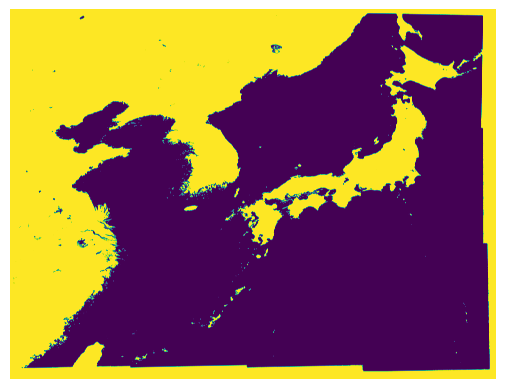

In [3]:
plt.imshow(mask)
plt.axis(False)

In [4]:
image_size = mask.shape
patch_size = 256

In [5]:
image_height, image_width = mask.shape[0], mask.shape[1]

num_patches_x = image_width // 256
num_patches_y = image_height // 256

# 패치들을 저장할 NumPy 배열을 초기화합니다. 패치의 개수와 크기에 맞춰 배열의 크기를 설정합니다.
# 이미지가 컬러라면 3차원, 흑백이라면 2차원일 것입니다. 여기서는 컬러 이미지를 가정합니다.
patches = np.empty((num_patches_y * num_patches_x, 256, 256), dtype=mask.dtype)

# 각 패치를 추출하여 NumPy 배열에 추가합니다.
for i in range(num_patches_y):
    for j in range(num_patches_x):
        # 패치의 시작점을 계산합니다.
        start_x = j * 256
        start_y = i * 256
        # NumPy 배열의 인덱스를 계산합니다.
        index = i * num_patches_x + j
        # 이미지에서 해당 패치를 추출하고 배열에 저장합니다.
        patches[index] = mask[start_y:start_y + 256, start_x:start_x + 256]

# NumPy 배열에 담긴 패치들의 정보를 확인합니다.
patches.shape


(1271, 256, 256)

(array([652.,  29.,  29.,  24.,  21.,  27.,  22.,  31.,  34., 402.]),
 array([    0. ,  6553.6, 13107.2, 19660.8, 26214.4, 32768. , 39321.6,
        45875.2, 52428.8, 58982.4, 65536. ]),
 <BarContainer object of 10 artists>)

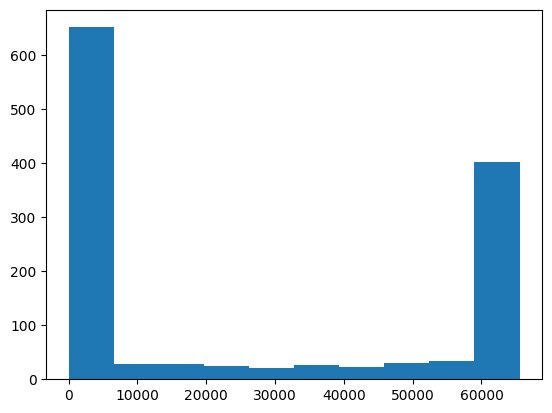

In [6]:
patch_sums = patches.reshape(num_patches_y * num_patches_x, -1).sum(axis=1)
plt.hist(patch_sums)

In [7]:
ocean_index = np.where(patch_sums==0)[0]
ocean_index

array([  71,   72,   76,   77,   78,   79,  111,  112,  113,  117,  118,
        119,  120,  151,  152,  153,  154,  158,  159,  160,  161,  191,
        192,  193,  194,  195,  231,  232,  233,  234,  235,  267,  268,
        269,  270,  271,  272,  273,  274,  275,  276,  283,  284,  307,
        308,  309,  310,  311,  312,  313,  314,  315,  316,  317,  322,
        323,  324,  325,  347,  348,  349,  350,  351,  352,  353,  354,
        355,  356,  357,  358,  359,  363,  364,  365,  366,  376,  387,
        388,  389,  390,  391,  392,  393,  394,  395,  396,  397,  398,
        399,  400,  405,  406,  407,  416,  420,  421,  429,  430,  431,
        432,  433,  434,  435,  436,  437,  438,  439,  446,  447,  448,
        462,  471,  474,  475,  476,  477,  478,  486,  487,  488,  489,
        503,  504,  512,  513,  514,  515,  516,  517,  518,  519,  527,
        528,  529,  530,  542,  543,  544,  545,  546,  553,  554,  555,
        556,  558,  568,  569,  570,  571,  581,  5

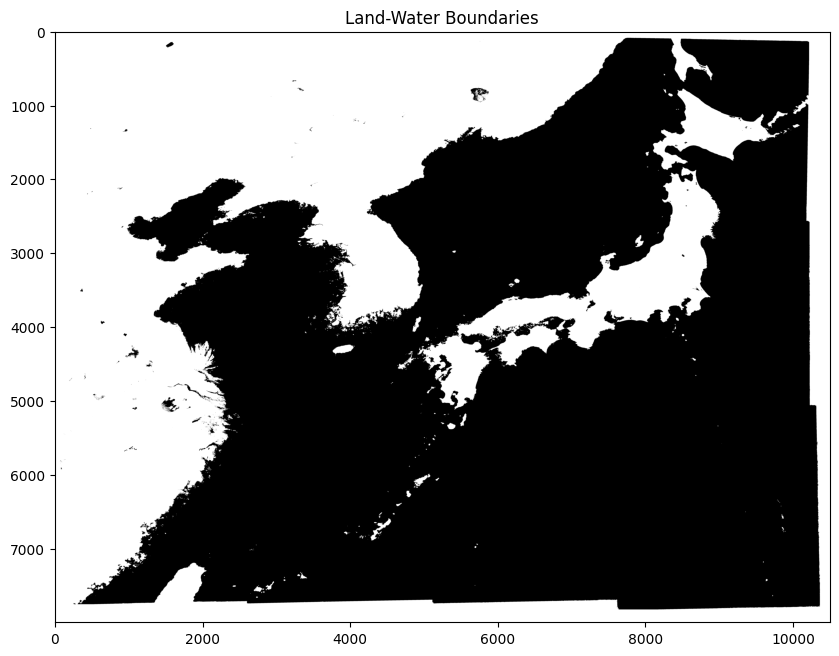

[]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Assuming `mask` is your 2D numpy array with 0s and 1s.
# mask = mat_file['Land']  # Already loaded in your code

# Use the Canny edge detector to find the boundaries
edges = cv2.Canny(mask.astype(np.uint8), 100, 200)

# Get the coordinates of the boundary points
boundary_coords = np.column_stack(np.where(edges > 0))

# Display the mask and boundaries
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.scatter(boundary_coords[:, 1], boundary_coords[:, 0], s=1, c='red')
plt.title('Land-Water Boundaries')
plt.show()

# Print the boundary coordinates
print(boundary_coords)


In [9]:
# import numpy as np
# import csv

# # Assuming 'mask' is your 2D numpy array with 0s and 1s.
# # For example, mask = mat_file['Land']

# def find_boundary_coordinates(mask):
#     boundary_coords = []

#     # Traverse through the entire mask array to detect the transition points
#     for i in range(1, mask.shape[0] - 1):
#         for j in range(1, mask.shape[1] - 1):
#             # Check if the current pixel is different from its right neighbor or bottom neighbor
#             if mask[i, j] != mask[i, j + 1] or mask[i, j] != mask[i + 1, j]:
#                 boundary_coords.append((i, j))  # (y, x) coordinate

#     return boundary_coords

# # Get the boundary coordinates
# boundary_coordinates = find_boundary_coordinates(mask)

# # Display the total number of boundary coordinates found
# print(f"Total boundary coordinates found: {len(boundary_coordinates)}")

# # Print a few boundary coordinates for verification
# print("Sample boundary coordinates:", boundary_coordinates[:10])

# # Optionally, you can split the coordinates into separate lists of x and y values
# y_coords, x_coords = zip(*boundary_coordinates)

# # Display the lists of x and y coordinates
# print("X Coordinates:", list(x_coords)[:10])
# print("Y Coordinates:", list(y_coords)[:10])

# # Save the boundary coordinates to a CSV file
# output_file = 'boundary_coordinates.csv'

# with open(output_file, 'w', newline='') as csvfile:
#     csvwriter = csv.writer(csvfile)
#     # Write the header
#     csvwriter.writerow(['Y Coordinate', 'X Coordinate'])
#     # Write the coordinates
#     csvwriter.writerows(boundary_coordinates)

# print(f"Boundary coordinates saved to {output_file}")


<Figure size 96000x64000 with 0 Axes>

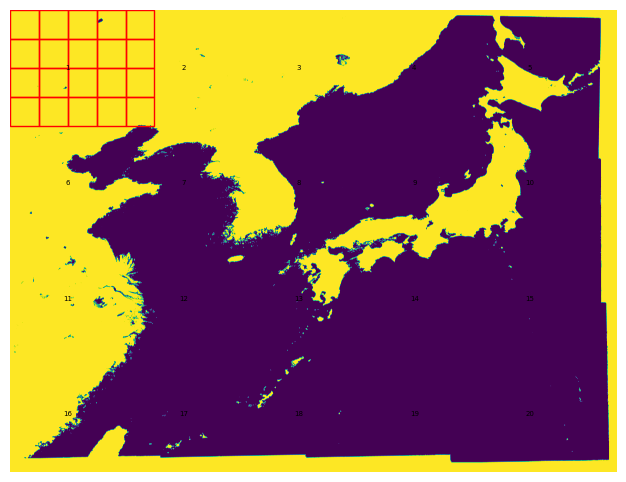

In [58]:
import matplotlib.patches as patches

height, width = mask.shape[:2]
plt.figure(figsize=(120,80), dpi=800)
# 플롯을 생성합니다.
fig, ax = plt.subplots(figsize=(8, 6))
# 이미지를 플롯에 렌더링합니다.
ax.imshow(mask)

# 패치 인덱스를 표시합니다.
for i in range(height // 2000):
    for j in range(width // 2000):
        # 각 패치의 중심 좌표를 계산합니다.
        center_x, center_y = j * 2000 + 1000, i * 2000 + 1000
        # 인덱스를 계산합니다 (1부터 시작).
        index = i * (width // 2000) + j + 1
#         print(index)
        # 인덱스 텍스트를 이미지에 추가합니다.
        ax.text(center_x, center_y, str(index), color='black', ha='center', va='center', fontsize=5)
        # 패치의 테두리를 그립니다.
        point =500
        rect = patches.Rectangle((j*point, i*point), point, point, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

# 축을 숨깁니다.
plt.axis('off')
plt.show()


Processing with box size 500 excluding indices [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 27, 29, 30, 31, 32, 33, 34, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 63, 64, 65, 66, 67, 69, 70, 71, 72, 83, 84, 85, 86, 104, 105, 106, 125, 126, 127, 128, 146, 147, 148, 149, 158, 167, 169, 170, 188, 189, 190, 191, 192, 209, 210, 211, 212, 213, 230, 231, 232, 233, 234, 235, 251, 252, 253, 254, 255, 272, 273, 274, 275, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 317, 318, 319, 320, 321, 322, 333, 334, 335, 336]


<Figure size 96000x64000 with 0 Axes>

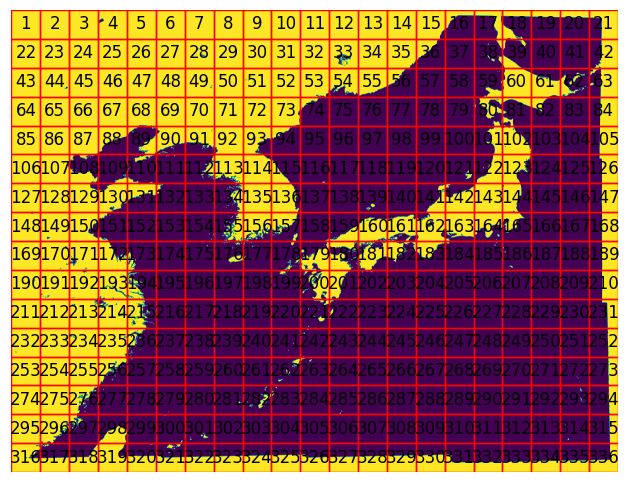

Total boundary coordinates found across all box sizes: 179443
Sample boundary coordinates: [(500, 7414), (500, 7415), (500, 7416), (500, 8399), (500, 8573), (500, 8646), (500, 8807), (500, 8808), (500, 8809), (500, 8810)]
All boundary coordinates saved to all_boundary_coordinates.csv


In [68]:
import numpy as np
import csv
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# Assuming 'mask' is your 2D numpy array with 0s and 1s.
# For example, mask = mat_file['Land']

def find_boundary_coordinates(mask, boxes, exclude_box_indices=None):
    boundary_coords = []

    # Ensure exclude_box_indices is a set for faster lookup
    if exclude_box_indices is None:
        exclude_box_indices = set()
    else:
        exclude_box_indices = set(exclude_box_indices)

    # Traverse through the entire mask array to detect the transition points
    for i in range(1, mask.shape[0] - 1):
        for j in range(1, mask.shape[1] - 1):
            # Check if the current pixel is different from its right neighbor or bottom neighbor
            if mask[i, j] != mask[i, j + 1] or mask[i, j] != mask[i + 1, j]:
                # Check if the coordinate is inside any of the boxes, skipping the excluded ones
                for idx, box in enumerate(boxes):
                    if idx in exclude_box_indices:
                        continue  # Skip the boxes specified in exclude_box_indices

                    if box['x'] <= j <= box['x'] + box['size'] and box['y'] <= i <= box['y'] + box['size']:
                        boundary_coords.append((i, j))  # (y, x) coordinate
                        break  # If it's in one box, no need to check further

    return boundary_coords

# Define the red boxes
def create_boxes(height, width, box_size=1915):
    boxes = []
    for i in range(height // box_size):
        for j in range(width // box_size):
            box = {
                'x': j * box_size,
                'y': i * box_size,
                'size': box_size
            }
            boxes.append(box)
    return boxes

# Function to process the mask with different box sizes and exclusion indices
def process_mask_with_boxes(mask, box_sizes_with_exclusions):
    all_boundary_coordinates = []

    for box_size, exclude_indices in box_sizes_with_exclusions.items():
        print(f"Processing with box size {box_size} excluding indices {exclude_indices}")

        # Create the boxes based on the current box size
        height, width = mask.shape[:2]
        boxes = create_boxes(height, width, box_size=box_size)

        # Plot the boxes on the mask
        plt.figure(figsize=(120, 80), dpi=800)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.imshow(mask)

        # Draw the boxes and their indices
        for idx, box in enumerate(boxes):
            rect = patches.Rectangle((box['x'], box['y']), box['size'], box['size'], linewidth=1, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            # Draw the index number inside the box
            ax.text(box['x'] + box['size'] / 2, box['y'] + box['size'] / 2, str(idx + 1),
                    color='black', ha='center', va='center', fontsize=12)

        plt.axis('off')
        plt.show()

        # Get the boundary coordinates within the red boxes, excluding the specified boxes
        boundary_coordinates = find_boundary_coordinates(mask, boxes, exclude_box_indices=exclude_indices)

        # Add the found boundary coordinates to the overall list
        all_boundary_coordinates.extend(boundary_coordinates)

    # Display the total number of boundary coordinates found
    print(f"Total boundary coordinates found across all box sizes: {len(all_boundary_coordinates)}")

    # Print a few boundary coordinates for verification
    print("Sample boundary coordinates:", all_boundary_coordinates[:10])

    # Save all the boundary coordinates to a single CSV file
    output_file = 'all_boundary_coordinates.csv'

    with open(output_file, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        # Write the header
        csvwriter.writerow(['Y Coordinate', 'X Coordinate'])
        # Write the coordinates
        csvwriter.writerows(all_boundary_coordinates)

    print(f"All boundary coordinates saved to {output_file}")

# Dictionary specifying box sizes and the indices to exclude for each
# box_sizes_with_exclusions = {
#     1900: [0, 1],
#     1650: [3],
#     1570: [16],
#     1500: [3],
#     1450: [16],
#     1350: [4],
#     1300: [4, 5, 16],
#     1250: [1, 2, 3, 4, 5, 6, 16],
#     1200: [6, 16],
#     1150: [16],
#     1100: [1, 2, 3, 4, 5, 6, 9, 16],
#     990: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16]
# }
box_sizes_with_exclusions = {
    500 : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,27,29,30,
 31,32,33,34,41,42,43,44,45,46,47,48,49,50,51,52,63,64,65,66,67,69,70,71,72,83,84,85,86,
 104,105,106,125,126,127,128,146,147,148,149,158,167,169,170,188,189,190,191,192,209,210,
 211,212,213,230,231,232,233,234,235,251,252,253,254,255,272,273,274,275,293,294,295,296,
 297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,
 317,318,319,320,321,322,333,334,335,336]
}

# Process the mask with different box sizes and exclusion indices, and save all results in one CSV file
process_mask_with_boxes(mask, box_sizes_with_exclusions)


<Figure size 96000x64000 with 0 Axes>

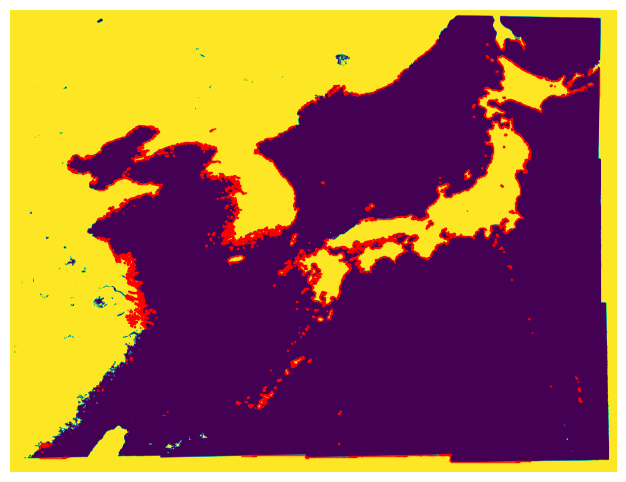

In [69]:
# import numpy as np
# import csv
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# # Function to plot boundary boxes
# def plot_boundary_boxes(mask, boundary_coords, box_size=1):
#     height, width = mask.shape[:2]
#     plt.figure(figsize=(120, 80), dpi=800)
#     # Create a plot
#     fig, ax = plt.subplots(figsize=(8, 6))
#     # Render the image in the plot
#     ax.imshow(mask)

#     # Draw a red box for each boundary coordinate
#     for y, x in boundary_coords:
#         # Calculate the top-left corner of the box
#         top_left_x = max(0, x - box_size // 2)
#         top_left_y = max(0, y - box_size // 2)

#         # Ensure the box doesn't go out of image bounds
#         if top_left_x + box_size > width:
#             top_left_x = width - box_size
#         if top_left_y + box_size > height:
#             top_left_y = height - box_size

#         # Draw the box
#         rect = patches.Rectangle((top_left_x, top_left_y), box_size, box_size, linewidth=1, edgecolor='red', facecolor='none')
#         ax.add_patch(rect)

#     # Hide the axes
#     plt.axis('off')
#     plt.show()

# # Function to load boundary coordinates from a CSV file
# def load_boundary_coordinates_from_csv(filename):
#     boundary_coords = []
#     with open(filename, 'r') as csvfile:
#         csvreader = csv.reader(csvfile)
#         next(csvreader)  # Skip the header
#         for row in csvreader:
#             y, x = int(row[0]), int(row[1])
#             boundary_coords.append((y, x))
#     return boundary_coords

# # Load boundary coordinates from the CSV file
# boundary_coordinates = load_boundary_coordinates_from_csv('all_boundary_coordinates.csv')

# # Plot the boundary boxes on the mask
# plot_boundary_boxes(mask, boundary_coordinates)


Processing with box size 500 excluding indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 27, 29, 30, 31, 32, 33, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 62, 63, 64, 65, 66, 69, 70, 71, 83, 84, 85, 104, 105, 106, 125, 126, 127, 128, 146, 147, 148, 167, 168, 169, 170, 188, 189, 190, 191, 192, 209, 210, 211, 212, 213, 230, 231, 232, 233, 251, 252, 253, 254, 272, 273, 274, 293, 294, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336]


<Figure size 96000x64000 with 0 Axes>

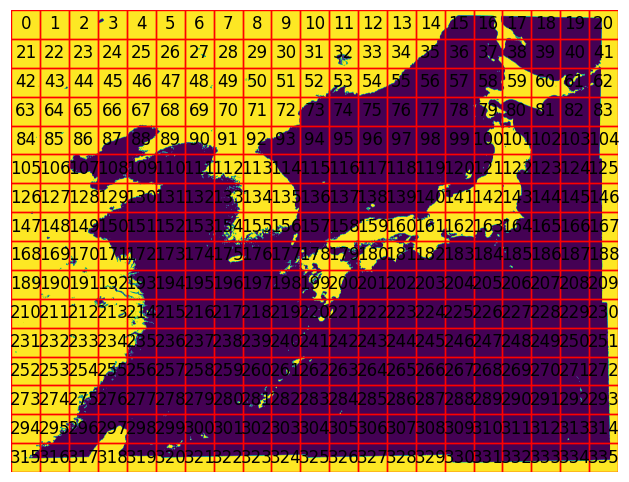

Total boundary coordinates found across all box sizes: 198225
Total excluded boundary coordinates: 61556
Sample boundary coordinates: [(501, 7413), (501, 8399), (501, 8571), (501, 8572), (501, 8646), (501, 8647), (501, 8854), (502, 7410), (502, 7411), (502, 7412)]
Sample excluded coordinates: [(91, 7750), (91, 7751), (91, 7752), (91, 7753), (91, 7754), (91, 7755), (91, 7756), (91, 7757), (91, 7758), (91, 7759)]
Included boundary coordinates saved to all_boundary_coordinates_included.csv
Excluded boundary coordinates saved to all_boundary_coordinates_excluded.csv


<Figure size 96000x64000 with 0 Axes>

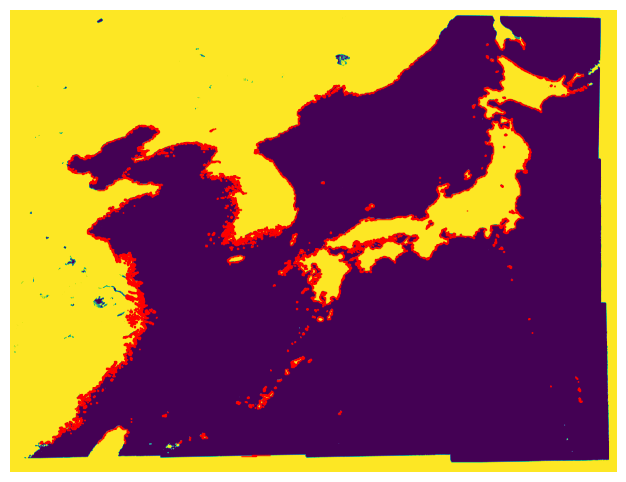

<Figure size 96000x64000 with 0 Axes>

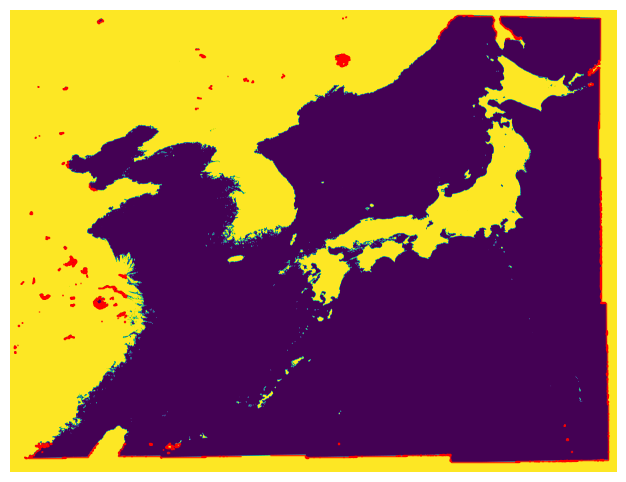

In [76]:
import numpy as np
import csv
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# Assuming 'mask' is your 2D numpy array with 0s and 1s.
# For example, mask = mat_file['Land']

def find_boundary_coordinates(mask, boxes, exclude_box_indices=None):
    boundary_coords = []
    excluded_coords = []

    # Ensure exclude_box_indices is a set for faster lookup
    if exclude_box_indices is None:
        exclude_box_indices = set()
    else:
        exclude_box_indices = set(exclude_box_indices)

    # Traverse through the entire mask array to detect the transition points
    for i in range(1, mask.shape[0] - 1):
        for j in range(1, mask.shape[1] - 1):
            # Check if the current pixel is different from its right neighbor or bottom neighbor
            if mask[i, j] != mask[i, j + 1] or mask[i, j] != mask[i + 1, j]:
                # Check if the coordinate is inside any of the boxes, skipping the excluded ones
                is_excluded = False
                for idx, box in enumerate(boxes):
                    if idx in exclude_box_indices:
                        if box['x'] <= j <= box['x'] + box['size'] and box['y'] <= i <= box['y'] + box['size']:
                            excluded_coords.append((i, j))  # Collect excluded coordinates
                            is_excluded = True
                            break
                    else:
                        if box['x'] <= j <= box['x'] + box['size'] and box['y'] <= i <= box['y'] + box['size']:
                            boundary_coords.append((i, j))  # Collect included coordinates
                            break
                if is_excluded:
                    continue

    return boundary_coords, excluded_coords

# Define the red boxes
def create_boxes(height, width, box_size=1915):
    boxes = []
    for i in range(height // box_size):
        for j in range(width // box_size):
            box = {
                'x': j * box_size,
                'y': i * box_size,
                'size': box_size
            }
            boxes.append(box)
    return boxes

# Function to process the mask with different box sizes and exclusion indices
def process_mask_with_boxes(mask, box_sizes_with_exclusions):
    all_boundary_coordinates = []
    all_excluded_coordinates = []

    for box_size, exclude_indices in box_sizes_with_exclusions.items():
        print(f"Processing with box size {box_size} excluding indices {exclude_indices}")

        # Create the boxes based on the current box size
        height, width = mask.shape[:2]
        boxes = create_boxes(height, width, box_size=box_size)

        # Plot the boxes on the mask
        plt.figure(figsize=(120, 80), dpi=800)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.imshow(mask)

        # Draw the boxes and their indices
        for idx, box in enumerate(boxes):
            rect = patches.Rectangle((box['x'], box['y']), box['size'], box['size'], linewidth=1, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            # Draw the index number inside the box
            ax.text(box['x'] + box['size'] / 2, box['y'] + box['size'] / 2, str(idx),
                    color='black', ha='center', va='center', fontsize=12)

        plt.axis('off')
        plt.show()

        # Get the boundary coordinates within the red boxes, including and excluding the specified boxes
        boundary_coordinates, excluded_coords = find_boundary_coordinates(mask, boxes, exclude_box_indices=exclude_indices)

        # Add the found boundary coordinates to the overall list
        all_boundary_coordinates.extend(boundary_coordinates)
        all_excluded_coordinates.extend(excluded_coords)

    # Display the total number of boundary coordinates found
    print(f"Total boundary coordinates found across all box sizes: {len(all_boundary_coordinates)}")
    print(f"Total excluded boundary coordinates: {len(all_excluded_coordinates)}")

    # Print a few boundary coordinates for verification
    print("Sample boundary coordinates:", all_boundary_coordinates[:10])
    print("Sample excluded coordinates:", all_excluded_coordinates[:10])

    # Save all the boundary coordinates to a single CSV file
    output_file_included = 'all_boundary_coordinates_included.csv'
    output_file_excluded = 'all_boundary_coordinates_excluded.csv'

    with open(output_file_included, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        # Write the header
        csvwriter.writerow(['Y Coordinate', 'X Coordinate'])
        # Write the included coordinates
        csvwriter.writerows(all_boundary_coordinates)

    with open(output_file_excluded, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        # Write the header
        csvwriter.writerow(['Y Coordinate', 'X Coordinate'])
        # Write the excluded coordinates
        csvwriter.writerows(all_excluded_coordinates)

    print(f"Included boundary coordinates saved to {output_file_included}")
    print(f"Excluded boundary coordinates saved to {output_file_excluded}")

# Function to plot boundary boxes
def plot_boundary_boxes(mask, boundary_coords, box_size=1):
    height, width = mask.shape[:2]
    plt.figure(figsize=(120, 80), dpi=800)
    # Create a plot
    fig, ax = plt.subplots(figsize=(8, 6))
    # Render the image in the plot
    ax.imshow(mask)

    # Draw a red box for each boundary coordinate
    for y, x in boundary_coords:
        # Calculate the top-left corner of the box
        top_left_x = max(0, x - box_size // 2)
        top_left_y = max(0, y - box_size // 2)

        # Ensure the box doesn't go out of image bounds
        if top_left_x + box_size > width:
            top_left_x = width - box_size
        if top_left_y + box_size > height:
            top_left_y = height - box_size

        # Draw the box
        rect = patches.Rectangle((top_left_x, top_left_y), box_size, box_size, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    # Hide the axes
    plt.axis('off')
    plt.show()

# Function to load boundary coordinates from a CSV file
def load_boundary_coordinates_from_csv(filename):
    boundary_coords = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip the header
        for row in csvreader:
            y, x = int(row[0]), int(row[1])
            boundary_coords.append((y, x))
    return boundary_coords

# Process the mask with different box sizes and exclusion indices, and save all results in one CSV file
box_sizes_with_exclusions = {
    500 : [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
           21,22,23,24,25,26,27,27,29,30,31,32,33
           ,41,42,43,44,45,46,47,48,49,50,51,62,
           63,64,65,66,69,70,71,83,84,85,104,
           105,106,125,
           126,127,128,146,
           147,148,167,
           168,169,170,188,
           189,190,191,192,209,
           210,211,212,213,230,
           231,232,233,251,252,253,254,272,
           273,274,293,
           294,
            # 301,302,303,304,305,306,307,308,309,310,311,312,313,
            314,
            315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336]
}
process_mask_with_boxes(mask, box_sizes_with_exclusions)

# Load included and excluded boundary coordinates from the CSV file
boundary_coordinates_included = load_boundary_coordinates_from_csv('all_boundary_coordinates_included.csv')
boundary_coordinates_excluded = load_boundary_coordinates_from_csv('all_boundary_coordinates_excluded.csv')

# Plot the included boundary boxes on the mask
plot_boundary_boxes(mask, boundary_coordinates_included)

# Plot the excluded boundary boxes on the mask
plot_boundary_boxes(mask, boundary_coordinates_excluded)


# 패치 시각화

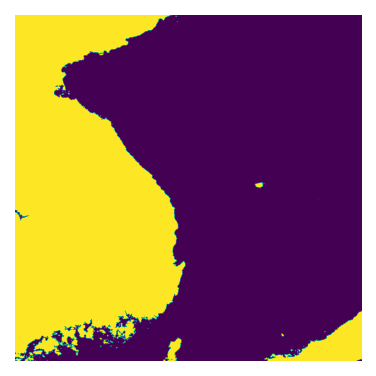

In [77]:
# 이미지의 높이와 너비를 구합니다.
image_height, image_width = mask.shape[0], mask.shape[1]

# 패치의 수를 계산합니다.
num_patches_x = image_width // 2000
num_patches_y = image_height // 2000

# 344번째 패치에 해당하는 좌표를 계산합니다.
# 인덱스는 1부터 시작하므로, 배열 인덱싱을 위해 1을 빼줍니다.
patch_idx = 8-1
patch_x = (patch_idx % num_patches_x) * 2000
patch_y = (patch_idx // num_patches_x) * 2000

# 해당 패치를 이미지에서 크롭합니다.
patch_image = mask[patch_y:patch_y + 2000, patch_x:patch_x + 2000]

# 패치를 시각화합니다.
plt.figure(figsize=(3, 3), dpi=150)
plt.imshow(patch_image)
plt.axis('off')  # 축 표시 제거
plt.show()


In [15]:

# np.set_printoptions(threshold=np.inf)
patch_image

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])